# Thématique : la Colonisation

## Nous avons télécharger sur CAMille-ULB les journaux du journal "Le soir" avec la requête ("La Colonisation"~4)

## Tous outils à importer

In [ ]:
import os
import PyPDF2


# d'autres importation

from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# Le reste des imports

from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
%pip install  fr_core_news_md


[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


## Vérifions  d'abord si tous nos fichiers sont en extension TXT

In [2]:

txt_path = '../data/txt'

txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
len(txts)

984

In [3]:
#  Lister les fichiers pdf qui n'ont pas encore été convertis en txt
not_converted_pdfs = []
for pdf in txts:
    file_name = os.path.splitext(pdf)[0]
    if file_name.endswith(".pdf") :
        not_converted_pdfs.append(pdf)
len(not_converted_pdfs)
print(not_converted_pdfs)

[]


In [4]:
!cat ../data/txt/*.txt > ../data/Tout.txt

In [5]:
with open("../data/Tout.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [6]:
!wc ../data/Tout.txt


      42  6173694 37342420 ../data/Tout.txt


# Analalyse de la distribution du vocabulaire

## Créer une une liste de stopwords

In [7]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

In [9]:
# Récupération du contenu du fichier
path = "../data/Tout.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]


# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9125824 words found


## Calculer la taille du vocabulaire

In [ ]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")


2819001 words kept (364394 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

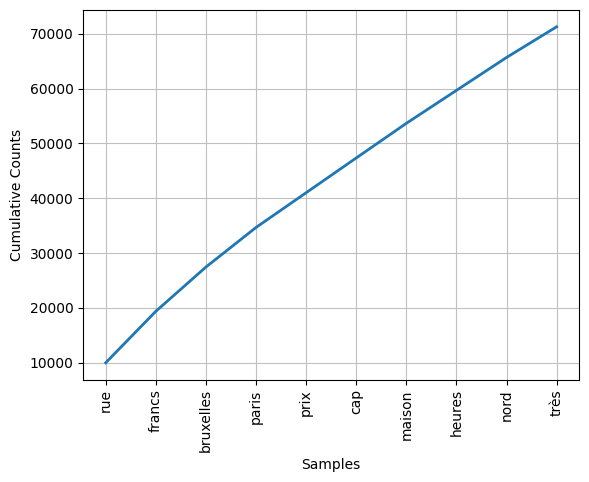

In [11]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [12]:
fdist.hapaxes()[:30]

['sarblc',
 'brùxellt',
 'parisiels',
 'iflfr',
 'lukubdubfilsr',
 'efuigeb',
 'lirmtionaii',
 'oiiln',
 'rvîî',
 'tfllltifws',
 'cossebvahok',
 'peogeîs',
 'soot',
 'fagencre',
 'ditœar',
 'rokirn',
 'mnuui',
 'baasenstciu',
 'tjjnew',
 'rros',
 'attribuéèparles',
 'oootipeht',
 'sétbie',
 'tribués',
 'confir',
 'agipil',
 'drfs',
 'élaboratioh',
 'suscita',
 'erenthal']

## Trouver les mots les plus longs du corpus

In [13]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiijiiiiiiiiiiiiiiiiiiiiitiiiiiiiiuiiiiiiiiiiitiiiiiiuiiiiiiiiiiiiiiiii',
 'iiinniiiiiiiniiimiiiiniiiniiiiiniiiiiiiiiiiiiiiiiiiiiiiiimi',
 'aaaaaaaaaaaaaaaaaaaaaaaaawaaaawaaaaaaaaaaaaaaaaaaaaaaaaaà',
 'regonstitufintàbasedsvingênéreuxrtdbquinqdis',
 'aamaaaaiauaaaaaaaaaaaaaaaajaaaaaaaaaaaabaaaa',
 'reconstituantàbaseiievlngenereuxetdequinquin',
 'reconstituantàbaselevingenereuxetdaquinquin',
 'recqnstituantàbasedevingënereuxetdequinquin',
 'reconstituantàbasedevingenereuxetdequinquin',
 'reconstituantàbasedevingénereuxetdequinquin',
 'reconstituantèbasedevingenereuxetdequinquin',
 'reconstituântàbasedevingénereuxetnequinquin',
 'recqnstituantâbasedeyinqênëreuxetdequinquin',
 'beconstituantàbasejevingénereuxetdequinquin',
 'reconstituantàbasedevingênëreuxetdequinquin',
 'reconstituântàbâsedavikqënereuxetdequsnquin',
 'reconstituantàbasedevingénereuxetdequinpin',
 'laplusimpwtanlomalsoiitlrroslerstluhoiiùe',
 'iisivenamimportebiffsnmnjwutellbdonffliw',
 'uplûsiniportantemaiflonua